# Exploratori Visualizations of GFP datasets

## Amino acid genotypes to brightness data


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

Read the table

In [4]:
df = pd.read_csv('amino_acid_genotypes_to_brightness.tsv', sep = '\t', engine = 'python')
df.head()

,aaMutations,uniqueBarcodes,medianBrightness,std
0,NaN,3645,3.719212,0.106992
1,SA108D,1,1.301030,NaN
2,SA108D:SN144D:SI186V:SM231T:SL234P,1,1.301031,NaN
3,SA108D:SY141N:SH146L:SE220G,1,1.301189,NaN
4,SA108G,2,3.708478,0.020613


Get the aaMutations column and make something pseudoreadable

In [5]:
muties = df['aaMutations'].str.split(':').apply(pd.Series)  #returns a dataframe with the aminoacids nicely separated 
muties.head()                                                  # ...and full of NaN's :_(

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SA108D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SA108D,SN144D,SI186V,SM231T,SL234P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SA108D,SY141N,SH146L,SE220G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SA108G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<img src='http://www.mememaker.net/static/images/memes/4156069.jpg'>

Number of unique aminoacd:

In [6]:
np.shape(pd.unique(muties.values.ravel())) #number of unique aminoacids

(1880L,)

Concatenate the NaNs to something not that NaN

In [7]:
df_sep = pd.concat([muties, df], axis=1)
df_sep = df_sep.drop(['aaMutations'], axis = 1) #droping the 'aaMutations' column 
df_sep.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,uniqueBarcodes,medianBrightness,std
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3645,3.719212,0.106992
1,SA108D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.301030,NaN
2,SA108D,SN144D,SI186V,SM231T,SL234P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.301031,NaN
3,SA108D,SY141N,SH146L,SE220G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.301189,NaN
4,SA108G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.708478,0.020613


### Some basic stuff
#### lenghts of aaMutants (rows)

In [7]:
mutants = df['aaMutations']       #split to list of aminoacids
mutants = mutants.str.split(':')
mutants.tail()

54020                    [SY90N, SN103S, SI169F]
54021    [SY90N, SQ175L, SL205Q, ST228A, SM231V]
54022                    [SY90R, SI150N, SN196S]
54023                    [SY90R, SI165T, SL234P]
54024    [SY90S, SN103D, SK105E, SF128L, SI150V]
Name: aaMutations, dtype: object

In [8]:
mut_len = np.zeros(len(mutants))  #start from index 1 to drop the first NaN
for i in xrange(1,mutants.shape[0]):
    mut_len[i]=len(mutants[i])

In [3]:
plt.hist(mut_len, bins=15)  #bins=15 bcause there is 15 unique values
plt.grid(True)
plt.xlabel('aaMutants number', fontsize = 15)
plt.show()

NameError: name 'mut_len' is not defined

3 and 4 times are the winners.

Also now we have the array **mut_len** to see how many mutantions per row we have

In [10]:
mut_len = mut_len[1:] #drop the first 0 !
mut_len

array([ 1.,  5.,  4., ...,  3.,  3.,  5.])

#### Single mutation with greatest brightness

In [11]:
bright_arr = df['medianBrightness'].drop(0).values

len(bright_arr)
#out: 54024 ok!

54024

In [12]:
bright_arr[np.where(mut_len==1)]

array([ 1.30103   ,  3.70847808,  3.8729702 , ...,  3.5420102 ,
        3.1261314 ,  1.5661629 ])

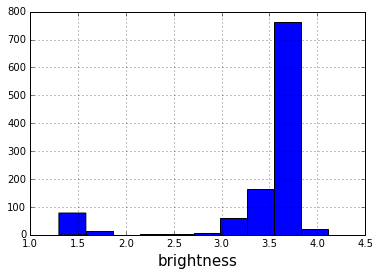

In [13]:
plt.hist(bright_arr[np.where(mut_len==1)])  #something cool happens when change mut_len == value
plt.grid(True)
plt.xlabel('brightness', fontsize=15)
plt.show()

plots to compare the distribution of brightness to the lenght of the aminoacid mutations

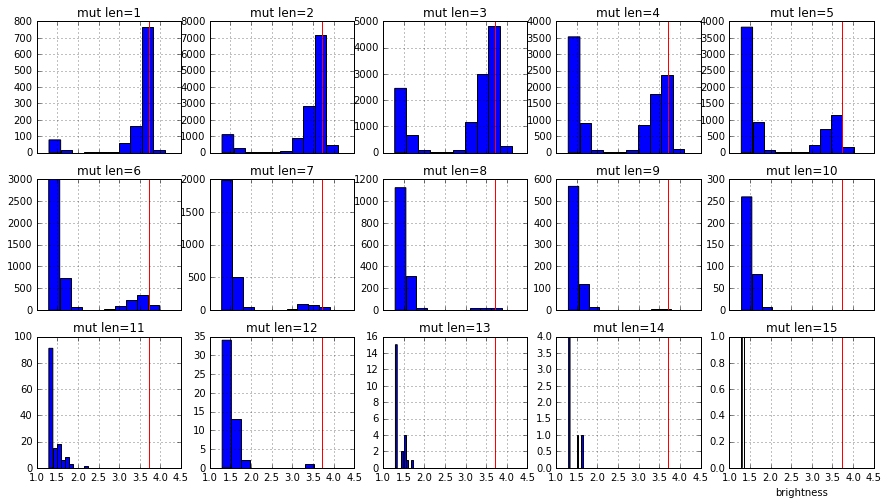

In [14]:

fig, axs = plt.subplots(3,5, figsize=(15, 8), sharex=True)
fig.subplots_adjust(hspace = .2, wspace=.2)

axs = axs.ravel()

for i in xrange(15):

    axs[i].hist(bright_arr[np.where(mut_len==i+1)])
    axs[i].grid(True)
    axs[i].set_title('mut len='+str(i+1))
    axs[i].axvline(x = 3.72, ymin = 0, ymax = 1, color = 'r') # wild value
    
plt.xlabel('brightness')
plt.show()
    

shure it's trivial but: **long mutation $\rightarrow$ small brightness value**.
What's going on here?!

In [15]:
df['medianBrightness'].describe()  #just for checking if it make sense

count    54025.000000
mean         2.626653
std          1.060261
min          1.283419
25%          1.414430
50%          3.259355
75%          3.608273
max          4.123109
Name: medianBrightness, dtype: float64